# Time Series Analysis with Pandas Workshop

## Data import 

In [1]:
try:
    import pandas as pd 
except:
    !pip install pandas
finally:
    import pandas as pd 

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates#Date Parser

import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

## Initial analysis in Pandas

<font size=4.5pt  face = 'georgia' style='Line-height :2'>
    
For the first let's open data-set -  Open Power Systems Data

Electricity production and consumption are reported as daily totals in gigawatt-hours (GWh).<br>

The columns of the data file are:<br>
* Date — The date (yyyy-mm-dd format)<br>
* Consumption — Electricity consumption in GWh<br>
* Wind — Wind power production in GWh<br>
* Solar — Solar power production in GWh<br>
* Wind+Solar — Sum of wind and solar power production in GWh<br>

In [3]:
path_ts = 'https://github.com/jenfly/opsd/raw/master/opsd_germany_daily.csv'

df = pd.read_csv(path_ts)

df.sample(15, random_state=0)

,Date,Consumption,Wind,Solar,Wind+Solar
965,2008-08-23,1152.011,NaN,NaN,NaN
2776,2013-08-08,1291.984,79.666,93.371,173.037
1334,2009-08-27,1281.057,NaN,NaN,NaN
3561,2015-10-02,1391.050,81.229,160.641,241.870
1248,2009-06-02,1201.522,NaN,NaN,NaN
3320,2015-02-03,1639.260,97.155,27.530,124.685
2339,2012-05-28,988.853,36.311,151.315,187.626
2016,2011-07-10,1023.542,22.717,NaN,NaN
154,2006-06-04,955.373,NaN,NaN,NaN
3944,2016-10-19,1503.565,204.847,38.170,243.017


In [4]:
print(df.shape)

(4383, 5)


<font size=4.5pt  face = 'georgia' style='Line-height :2'>
    
You can also use the `info()` method to check out your data types, number of rows and more:    

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


<font size=4.5pt  face = 'georgia' style='Line-height :2'>
Replace index column with date one

In [6]:
df.Date = pd.to_datetime(df.Date)
df.set_index('Date', inplace=True)
df.sample(15, random_state=0)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2008-08-23,1152.011,NaN,NaN,NaN
2013-08-08,1291.984,79.666,93.371,173.037
2009-08-27,1281.057,NaN,NaN,NaN
2015-10-02,1391.050,81.229,160.641,241.870
2009-06-02,1201.522,NaN,NaN,NaN
2015-02-03,1639.260,97.155,27.530,124.685
2012-05-28,988.853,36.311,151.315,187.626
2011-07-10,1023.542,22.717,NaN,NaN
2006-06-04,955.373,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
dtypes: float64(4)
memory usage: 171.2 KB


<font size=4.5pt  face = 'georgia' style='Line-height :2'>
Some summarization of the data can be also obtained using `describe()` method

In [8]:
df.describe()

,Consumption,Wind,Solar,Wind+Solar
count,4383.000000,2920.000000,2188.000000,2187.000000
mean,1338.675836,164.814173,89.258695,272.663481
std,165.775710,143.692732,58.550099,146.319884
min,842.395000,5.757000,1.968000,21.478000
25%,1217.859000,62.353250,35.179250,172.185500
50%,1367.123000,119.098000,86.407000,240.991000
75%,1457.761000,217.900250,135.071500,338.988000
max,1709.568000,826.278000,241.580000,851.556000


It is also can be important to take some pivot analysis of our data.


<font size=4.5pt  face = 'georgia' style='Line-height :2'>

The DataFrame has<br>
4383 rows, covering the period from January 1, 2006 through December 31, 2017.<br>
To see what the data looks like, let’s use the `head()` and `tail()` methods to display the first three and last three rows.

In [9]:
df.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


In [10]:
df.tail(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-12-29,1295.08753,584.277,29.854,614.131
2017-12-30,1215.44897,721.247,7.467,728.714
2017-12-31,1107.11488,721.176,19.980,741.156


<font size=4.5pt  face = 'georgia' style='Line-height :2'>

Next, let’s check out the data types of each column.

In [13]:
df.dtypes

Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

<font size=4.5pt  face = 'georgia' style='Line-height :2'>

Actually it is better to use another way to open data-set.<br>
We can assign Date column as index one during reading.<br>
Also it is possible here to parse it into `year`, `month` and `day` parts.

In [14]:
df = pd.read_csv(path_ts, parse_dates=['Date'], index_col="Date")
df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


<font size=4.5pt  face = 'georgia' style='Line-height :2'>

Now we are able to locate our data by its index

In [15]:
df.loc['2017-08-10']

Consumption    1351.491
Wind            100.274
Solar            71.160
Wind+Solar      171.434
Name: 2017-08-10 00:00:00, dtype: float64

<font size=4.5pt  face = 'georgia' style='Line-height :2'>

A set of data are able to locate by its indexes range

In [16]:
df.loc['2014-01-20':'2014-01-22']

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2014-01-20,1590.687,78.647,6.371,85.018
2014-01-21,1624.806,15.643,5.835,21.478
2014-01-22,1625.155,60.259,11.992,72.251


<font size=4.5pt  face = 'georgia' style='Line-height :2'>

A set of data for one column are also able to be indexed by several ways:<br>
1-rst way - using addition parameter in method `loc`:

In [17]:
df.loc['2014-01-20':'2014-01-25', 'Wind']

Date
2014-01-20     78.647
2014-01-21     15.643
2014-01-22     60.259
2014-01-23    125.177
2014-01-24    106.527
2014-01-25    145.786
Name: Wind, dtype: float64

<font size=4.5pt  face = 'georgia' style='Line-height :2'>

2-nd way - using specific method of data frame:

In [18]:
df.Wind.loc['2014-01-20':'2014-01-25']

Date
2014-01-20     78.647
2014-01-21     15.643
2014-01-22     60.259
2014-01-23    125.177
2014-01-24    106.527
2014-01-25    145.786
Name: Wind, dtype: float64

<font size=4.5pt  face = 'georgia' style='Line-height :2'>

3-rd way - using dataframe key-word:

In [127]:
df[['Wind']].loc['2014-01-20':'2014-01-25']

,Wind
Date,
2014-01-20,78.647
2014-01-21,15.643
2014-01-22,60.259
2014-01-23,125.177
2014-01-24,106.527
2014-01-25,145.786


In [130]:
df['Wind'].loc['2014-01-20':'2014-01-25']

Date
2014-01-20     78.647
2014-01-21     15.643
2014-01-22     60.259
2014-01-23    125.177
2014-01-24    106.527
2014-01-25    145.786
Name: Wind, dtype: float64

<font size=4.5pt  face = 'georgia' style='Line-height :2'>
Beside key-words addressing, the data can be addressed as matrix element 

In [22]:
df.iloc[0:2,0:3]

,Consumption,Wind,Solar
Date,,,
2006-01-01,1069.184,NaN,NaN
2006-01-02,1380.521,NaN,NaN


<font size=4.5pt  face = 'georgia' style='Line-height :2'>

ALso by data parsing as `DateTimeIndex` we are able to get dialed data-stamps information


In [114]:
print(df.index.day)
print(df.index.weekday)
print(df.index.year)

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64', name='Date', length=4383)
Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            4, 5, 6, 0, 1, 2, 3, 4, 5, 6],
           dtype='int64', name='Date', length=4383)
Int64Index([2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Date', length=4383)


<font size=4.5pt  face = 'georgia' style='Line-height :2'>
    
We can represent the data with different frequency. 
<br> In the investigate dataset it taken with frequency 1 day,<br>
However it is also possible to use `D` -day, `W`,`M`,`Y` for week, month and year correspondingly.

In [115]:
df[['Wind']].loc['2014-01-20':'2014-02-25'].asfreq('W')

,Wind
Date,
2014-01-26,184.365
2014-02-02,107.799
2014-02-09,423.278
2014-02-16,408.778
2014-02-23,183.838


<font size=4.5pt  face = 'georgia' style='Line-height :2'>
    
Using data parsing we can indexed it in the shorter following form, for instance for feb 2012

In [116]:
df.loc['2012-02'].asfreq('W')

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2012-02-05,1279.432,55.522,54.572,110.094
2012-02-12,1264.254,62.659,45.176,107.835
2012-02-19,1107.431,272.655,30.382,303.037
2012-02-26,1086.743,95.234,37.214,132.448


<font size=4.5pt  face = 'georgia' style='Line-height :2'>
It is also possible to use range notation same as for list type.    

In [117]:
df.loc['2012':].asfreq('Y')

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2012-12-31,969.81000,446.492,25.097,471.589
2013-12-31,1068.42900,174.670,43.219,217.889
2014-12-31,1183.51000,145.511,3.721,149.232
2015-12-31,1158.10300,358.330,20.226,378.556
2016-12-31,1212.56800,315.063,34.580,349.643
2017-12-31,1107.11488,721.176,19.980,741.156


<font size=4.5pt  face = 'georgia' style='Line-height :2'>
The following style will be better    

In [118]:
df.loc['2012':].asfreq('Y').set_index(df.loc['2012':].asfreq('Y').index.year)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2012,969.81000,446.492,25.097,471.589
2013,1068.42900,174.670,43.219,217.889
2014,1183.51000,145.511,3.721,149.232
2015,1158.10300,358.330,20.226,378.556
2016,1212.56800,315.063,34.580,349.643
2017,1107.11488,721.176,19.980,741.156


<font size=4.5pt  face = 'georgia' style='Line-height :2'>
    
It is better to remove `NaN` values form investigated time series.<br>
>Actually `NaN` can be filled with method ```ffill```   or ```bfill``` for instance using method ```.asfreq('D', method='ffill')``` It is also possible to use such methods as `dropna` and `filna`  <br>
    
First lets count `NaN` values 
>Note it is also possible to use `isnull` instead of `isna` with similar effect.

In [123]:
df.isna().sum()

Consumption    0
Wind           0
Solar          0
Wind+Solar     0
dtype: int64

<font size=4.5pt  face = 'georgia' style='Line-height :2'>

Then we can replace it <br>
>Note It is also possible to drop all raws till Last `NaN` using `dropna` method.

In [176]:
df.fillna(0, inplace=True)
df.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,0.0,0.0,0.0
2006-01-02,1380.521,0.0,0.0,0.0
2006-01-03,1442.533,0.0,0.0,0.0


<font size=4.5pt  face = 'georgia' style='Line-height :2'>
    
If index has data format the data can be analyses by conventional data periods (frequencies), like month, year, week, day and e.t.c.<br>
Each  frequency denoted by corresponding letter, like `W`-week, 'Y' and `A` - year, end e.t.c.<br>
It is also can be used such frequencies as `'2y'` - for grouping by 2 years, end e.t.c.<br>
There are ``` groupby```, ```resample``` and ```asfreq``` methods can be used for grouping by time period, .
As a rule after grouping values some summarization can be taken, such as `sum`, `mean`, `median` or `std`.  <br>
Below the total year consumption summarization is shown using groupby and resample  and. 

In [245]:
df.groupby(pd.Grouper(freq='1y')).sum()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-12-31,489068.53600,0.000,0.000,0.000
2007-12-31,496631.84700,0.000,0.000,0.000
2008-12-31,495570.87600,0.000,0.000,0.000
2009-12-31,459737.42800,0.000,0.000,0.000
2010-12-31,488588.70000,35911.777,0.000,0.000
2011-12-31,484814.08600,44032.951,0.000,0.000
2012-12-31,469574.75400,45862.667,27887.332,73749.999
2013-12-31,463336.85300,47197.832,29559.780,76697.443
2014-12-31,504164.82100,51107.672,32498.307,83370.502


In [243]:
df.resample('1w').median().head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,0.0,0.0,0.0
2006-01-08,1403.427,0.0,0.0,0.0
2006-01-15,1545.002,0.0,0.0,0.0


In [240]:
df.asfreq('1w').head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,0.0,0.0,0.0
2006-01-08,1207.985,0.0,0.0,0.0
2006-01-15,1265.475,0.0,0.0,0.0


The full list of frequencies with its description can be find in this book
https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html


### Exercise 1

<font size=4.5pt  face = 'georgia' style='Line-height :2'>
    
1. Add to data frame addition columns with `Year`, `Weekday` and `Month` number, check the result.<br>
2. Add column `'other sources'` which is difference between `total` consumption and `wind+solar` one.<br>
3. Add column `'ratio of Wind+Solar'` which is ratio between `Wind+Solar` to `whole` consumption.<br>
4. Create  an addition dataset with drop all `NaN` values.   
<!--     
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Weekday Name'] = df.index.weekday -->
    
    

In [14]:

df['year'] = df.index.year

df.head()

,Consumption,Wind,Solar,Wind+Solar,year
Date,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006
2006-01-02,1380.521,NaN,NaN,NaN,2006
2006-01-03,1442.533,NaN,NaN,NaN,2006
2006-01-04,1457.217,NaN,NaN,NaN,2006
2006-01-05,1477.131,NaN,NaN,NaN,2006


In [17]:
df['other'] = df.Consumption - df['Wind+Solar']
df.sample(3)

,Consumption,Wind,Solar,Wind+Solar,year,other
Date,,,,,,
2007-07-21,1146.038,NaN,NaN,NaN,2007,NaN
2013-07-01,1249.752,88.984,184.643,273.627,2013,976.125
2017-03-29,1455.418,347.697,115.056,462.753,2017,992.665


In [18]:
df_full = df.dropna()
df_full.head()

,Consumption,Wind,Solar,Wind+Solar,year,other
Date,,,,,,
2012-01-01,948.128,227.465,6.587,234.052,2012,714.076
2012-01-02,1269.581,207.327,6.574,213.901,2012,1055.680
2012-01-03,1334.745,473.468,24.679,498.147,2012,836.598
2012-01-04,1347.136,499.804,14.681,514.485,2012,832.651
2012-01-05,1376.658,523.851,5.071,528.922,2012,847.736


 <font size=4.5pt  face = 'georgia' style='Line-height :2'>
    
## Visualizing time series data pandas

 <font size=4.5pt  face = 'georgia' style='Line-height :2'>

With pandas and matplotlib, we can easily visualize our time series data. 

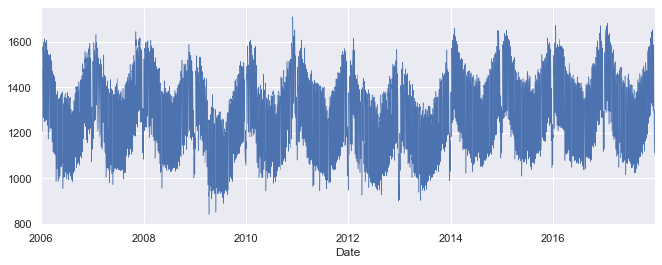

In [175]:
df['Consumption'].plot(linewidth=0.5);

<font size=4.5pt  face = 'georgia' style='Line-height :2'>
    
The `plot()` method has represent data pretty good.<br>
However, with so many data points, the line plot is crowded and hard to read. <br>
Let’s plot the data as dots instead, and also look at the Solar and Wind time series.

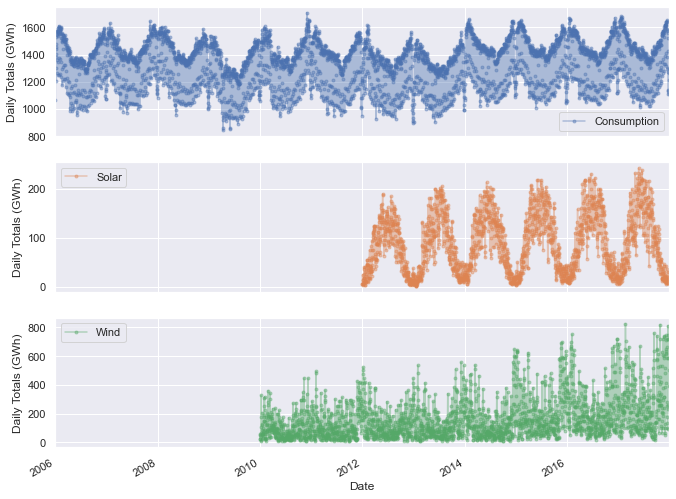

In [14]:
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = df[cols_plot].plot(marker='.', alpha=0.4, linestyle='-', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

<font size=4.5pt  face = 'georgia' style='Line-height :2'>
    
It is also useful to plot total consumption  and the wind and solar power production together as a stacked area plot.<br>
Below the data shown for month period.<br>
>*Note*  the min_count parameter set to change the `NaN` values to $0$.<br>


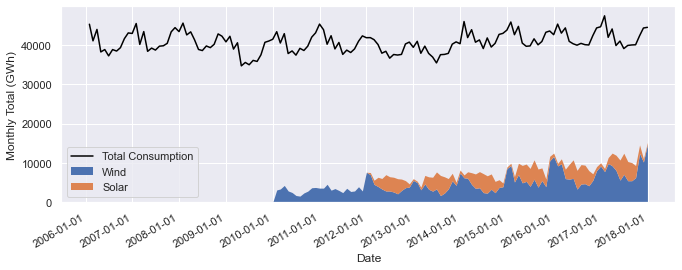

In [385]:
df_monthly = df.resample('M').sum(min_count=7)


fig, ax = plt.subplots()
ax.plot(df_monthly['Consumption'], color='black', label='Total Consumption')

df_monthly[['Wind', 'Solar']].plot.area(ax=ax, linewidth=0)

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Monthly Total (GWh)');

<font size=4pt  face = 'georgia' style='Line-height :2; '>

The initial analysis of the previous plots shows:<br><blockquote>
<li>The Consumption, Solar, and Wind time series oscillate between high and low values on a yearly time scale, corresponding with the seasonal changes in weather over the year. 
<li> Electricity consumption is highest in winter, presumably due to electric heating and increased lighting usage, and lowest in summer.
<li> Electricity consumption appears to split into two clusters <ul>
    <li> — one with oscillations centered roughly around 1400 GWh, 
    <li>  and another with fewer and more scattered data points, centered roughly around 1150 GWh.
        <ul>    
            We might guess that these clusters correspond with weekdays and weekends, and we will investigate this further shortly.</ul>
    </ul></li>    
<li> Solar power production is highest in summer, when sunlight is most abundant, and lowest in winter.
<li> Wind power production is highest in winter, presumably due to stronger winds and more frequent storms, and lowest in summer.
<li> There appears to be a strong increasing trend in wind power production over the years.

Seasonality can also occur on other time scales. The plot above suggests there may be some weekly seasonality in Germany’s electricity consumption, corresponding with weekdays and weekends. Let’s plot the time series in a single year to investigate further.

<font size=4pt  face = 'georgia' style='Line-height :2; '>
    
The 2-clsuter behavior of consumption can be proved using histogram.<br>
In the Plot Below it can be notice that distribution have two peaks, about 1100 and 1400 GWh<br>
Beside bins-hist it can be approximated using  ```    ax = df.Consumption.plot(kind='kde' )
    ```  

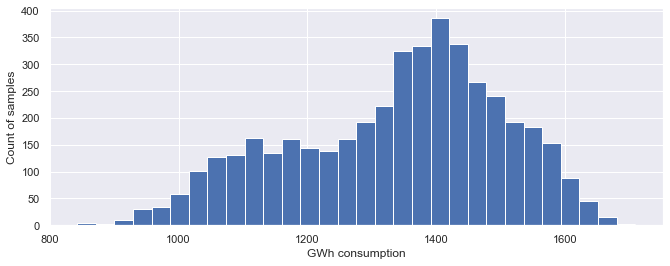

In [284]:
ax = df.Consumption.hist(bins=30)
ax.set_ylabel('Count of samples')
ax.set_xlabel('GWh consumption')
plt.show()

### Exercise 2

<font size=4.5pt  face = 'georgia' style='Line-height :2'>

1. Plot data for other sources and for ratio of wind+solar to whole consumption (see exercise 1).<br>
    
2. Make your own conclusion about the consumption of other sources.<br>
3. Make conclusion about the relationship between (ratio) of solar and wind sources for whole electricity consumption.  

    

<font size=4pt  face = 'georgia' style='Line-height :2; '>
    
Seasonality can also occur on other time scales.<br> The plot above allowing suggests there may be some weekly seasonality inelectricity consumption, corresponding with weekdays and weekends. 

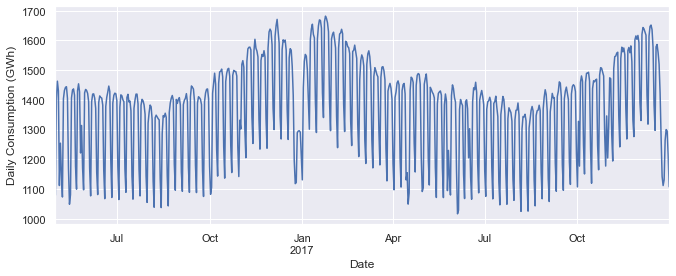

In [325]:
ax = df.loc['2016-05':, 'Consumption'].plot()
ax.set_ylabel('Daily Consumption (GWh)');

<font size=4pt  face = 'georgia' style='Line-height :2; '>

The plot showing weekly oscillations.<br>
 With global minimum of electricity consumption in early January and late December, probably during the holidays.<br>
For check this we can re-sample data with week mean values.


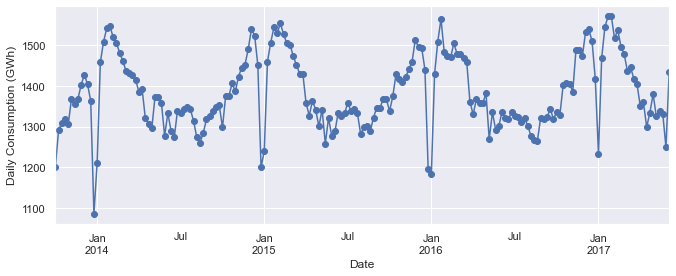

In [83]:
ax = df.loc['2013-10':'2017-05', 'Consumption'].\
    resample('W').mean().plot(marker='o', linestyle='-',linewidth=1.5)
ax.set_ylabel('Daily Consumption (GWh)')
plt.show()

<font size=4pt  face = 'georgia' style='Line-height :2; '>
    
Also it could be valuable to plot  a zoomed relation

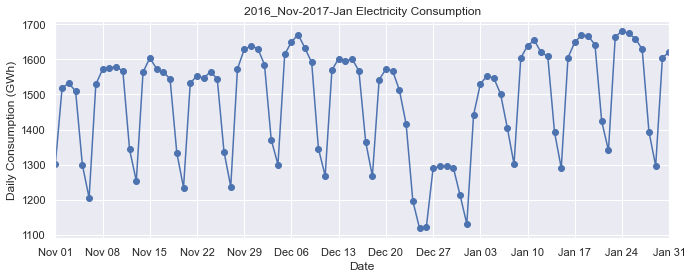

In [192]:
ax = df.loc['2016-11':'2017-01', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('2016_Nov-2017-Jan Electricity Consumption')

# For more convinient ticks (week ticks)
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
# Format 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.show()

<font size=4pt  face = 'georgia' style='Line-height :2; '>
    
It is obvious from the plot above, that consumption is highest on weekdays and lowest on weekends.

<font size=4pt  face = 'georgia' style='Line-height :2; '>
    
The preliminary analysis of data shows the presence  of some seasonality and trend parts.<br> 
To identifying trends in time series we can use a several ways. One popular way is by taking a rolling average, which means that, for each time point, you take the average of the points on either side of it.<br>
    Note that the number of points is specified by a window size, which you need to choose.<br><br>
As it was assumed above we can check a year trend in wind consumption.<br>
    
>*Note* we can rolling simply with some period. for instance 
<code> 
df.Wind.rolling(365)
</code> 
however it is better to use so-called **data frequency**, for instance `'365d'`

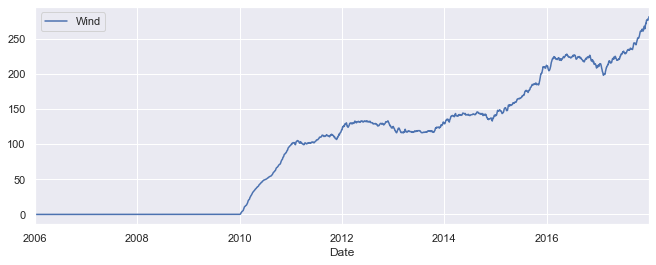

In [246]:
df[['Wind']].rolling('365d').mean().plot( linewidth=1.5, );

<font size=4pt  face = 'georgia' style='Line-height :2; '>

We are also can check the trend using boxplot to group the data by different time periods and display the distributions for each group. <br>
    
For the first let's build year plot for wind to confirm its trend-line.
    

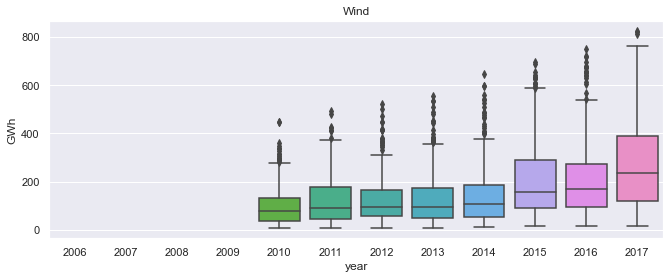

In [44]:
ax = sns.boxplot(data=df, x=df.index.year, y='Wind')
ax.set_ylabel('GWh')
ax.set_xlabel('year')
ax.set_title('Wind')
plt.show()


<font size=4pt  face = 'georgia' style='Line-height :2; '>
The alternative representation of the boxplot is violinplot, which has the same interpretation.

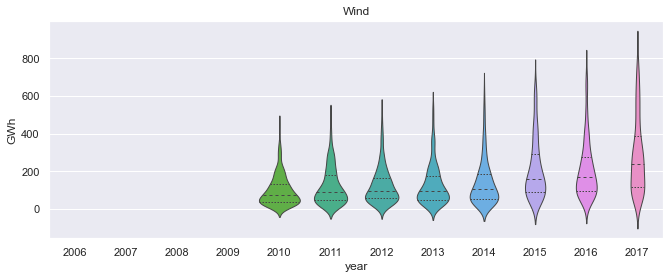

In [47]:
ax=sns.violinplot(data=df, x=df.index.year, y='Wind',
               split=True, inner="quart", linewidth=1, )
ax.set_ylabel('GWh')
ax.set_xlabel('year')
ax.set_title('Wind')
plt.show()

<font size=4pt  face = 'georgia' style='Line-height :2; '>
It is also possible to build trend dependence as bar plot

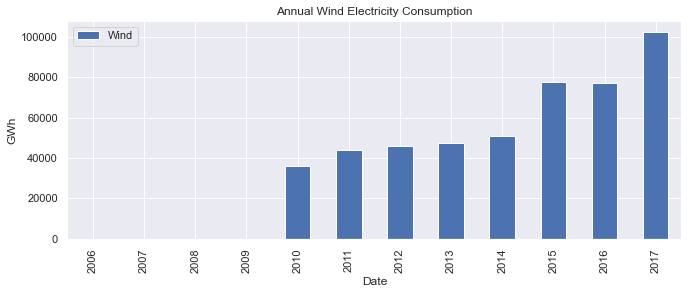

In [208]:
df_test = df[['Wind']].resample('Y').sum()

ax = df_test.set_index(df_test.index.year).plot.bar()
ax.set_title('Annual Wind Electricity Consumption')
ax.set_ylabel('GWh');


<font size=4pt  face = 'georgia' style='Line-height :2; '>
    
In addition to previous, trend can be estimated using built-in smoothing methods,<br>
Below the example for exponential weighted (EW) moving average is shown.

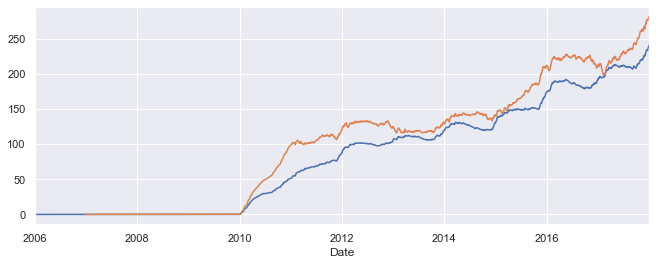

In [247]:
df.Wind.ewm(halflife=365, min_periods=0,adjust=True).mean().plot()
df.Wind.rolling(365).mean().plot();

<font size=4pt  face = 'georgia' style='Line-height :2; '>
    
Beside the trend behavior it is interesting to check seasonality of data.<br>
    


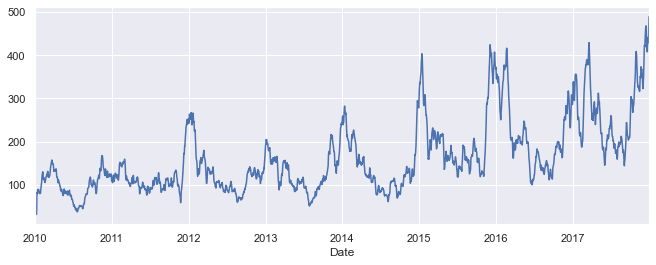

In [248]:
df.loc['2010':, 'Wind'].rolling('30d').mean().plot( linewidth=1.5, );

<font size=4pt  face = 'georgia' style='Line-height :2; '>
It is also will be useful to build plot using resample, as it is shown below.    

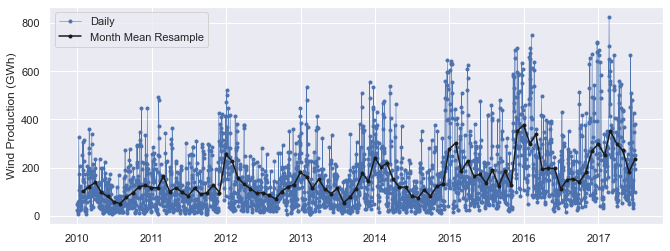

In [7]:
start, end = '2010-01', '2017-06'

fig, ax = plt.subplots()
ax.plot(df.loc[start:end, 'Wind'],marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(df.resample('M').mean().loc[start:end, 'Wind'], marker='o', markersize=3, linestyle='-', label='Month Mean Resample', color='k')
ax.set_ylabel('Wind Production (GWh)')
ax.legend();


<font size=4pt  face = 'georgia' style='Line-height :2; '>
As we can see here is  presence of non-stable seasonality.<br>    
It is also possible to check seasonality with using barplot.<br>
Below the barplot is taken for data grouped by month.
    

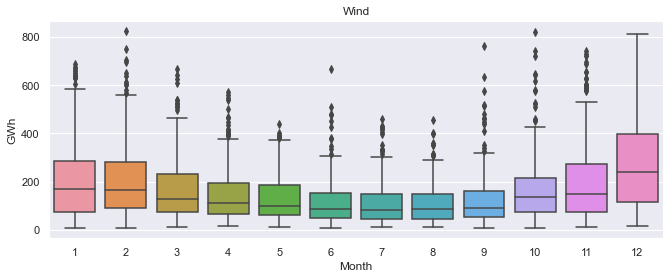

In [8]:
ax = sns.boxplot(data=df, x=df.index.month, y='Wind')
ax.set_ylabel('GWh')
ax.set_xlabel('Month')
ax.set_title('Wind')
plt.show()

<font size=4pt  face = 'georgia' style='Line-height :2; '>
    
The plot above shows that the wind power distributions have many outliers, <br>
It can be assumed that the outliers are due to the extreme wind speeds events associated with storms and other transient weather conditions.

In [349]:
df.loc[str(year):str(year)+'-12', 'Wind'].resample('30d').mean()

Date
2014-01-01    203.955533
2014-01-31    209.698400
2014-03-02    155.243172
2014-04-01    118.409033
2014-05-01    119.957933
2014-05-31     83.773967
2014-06-30     76.262933
2014-07-30    108.607600
2014-08-29     84.810200
2014-09-28    120.336133
2014-10-28    110.850200
2014-11-27    290.058600
2014-12-27    160.800800
Freq: 30D, Name: Wind, dtype: float64

<font size=4pt  face = 'georgia' style='Line-height :2; '>
The other way to study seasonality is to use segmentation  (rolling) of data.<br>
Below the month segmentation is shown for wind consumption.   

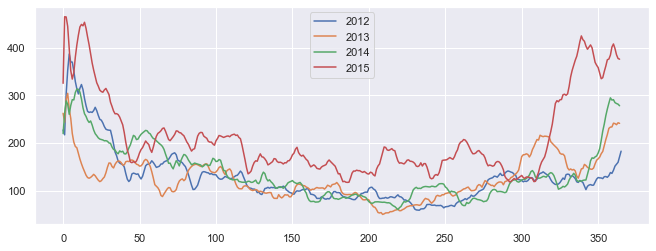

In [9]:
for year in list(set(df.index.year))[-4:]:
    plt.plot(df.loc[str(year):str(year)+'-12', 'Wind'].rolling('30d').mean().values, label=year)
plt.legend()    

<font size=4pt  face = 'georgia' style='Line-height :2; '>
Here it can be notice that indeed seasonality is unstable (non-stationary) with goring intensity from year-to-year.     

<font size=4pt  face = 'georgia' style='Line-height :2; '>
    
Beside the month behavior it might be important to check week-days seasonality.<br>
Below the barplot is taken for data grouped by week-days.    

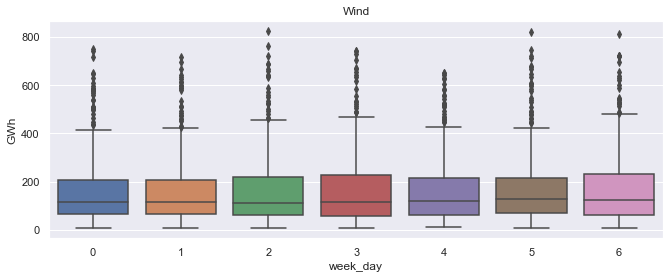

In [10]:
ax = sns.boxplot(data=df, x=df.index.weekday, y='Wind');
ax.set_ylabel('GWh')
ax.set_xlabel('week_day')
ax.set_title('Wind')
plt.show()

<font size=4pt  face = 'georgia' style='Line-height :2; '>
    
Here its i snot obvious for wind weather it is presence or not any periodic week-days behavior.   <br>
However, we can assume to see it in full consumption plot.   <br>
>*Note* we are starting from Monday.
    

### Exercise 3

<font size=4.5pt  face = 'georgia' style='Line-height :2'>
    

1. Check the hypothesis about decrease of consumption during holidays using boxplot. 
1. Investigate consumption and solar time series no their trend, month and week seasonality.
2. Make conclusion about seasonal and trend behavior of other source (see ex.1).    
3. Make conclusion about trend in ratio of Wind+solar and other sources. 

## References

https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

https://towardsdatascience.com/an-ultimate-guide-to-time-series-analysis-in-pandas-76a0433621f3

http://www.blackarbs.com/blog/advanced-time-series-plots-in-python/1/6/2017

https://www.machinelearningplus.com/time-series/time-series-analysis-python/

## Addition tricks in Pandas

In [10]:
import pandas as pd
import numpy as np
df1 = pd.DataFrame({'day1':[22,25,28],
                    'day2':[10,14,13],
                    'day3':[25,22,26]})
df1

,day1,day2,day3
0,22,10,25
1,25,14,22
2,28,13,26


In [7]:
df1.melt()

,variable,value
0,day1,22
1,day1,25
2,day1,28
3,day2,10
4,day2,14
5,day2,13
6,day3,25
7,day3,22
8,day3,26


In [8]:
df1.stack()

0  day1    22
   day2    10
   day3    25
1  day1    25
   day2    14
   day3    22
2  day1    28
   day2    13
   day3    26
dtype: int64

In [32]:
idxs = range(5)

index = pd.Index(idxs)

df2 = pd.DataFrame(data = np.random.randint(10, size=(5,2)), 
                   index=index, 
                   columns=['column_x', 'column_y'])
df2

,column_x,column_y
0,1,8
1,4,8
2,2,7
3,4,9
4,1,4


In [33]:
df_stacked = df2.stack().to_frame()
df_stacked

0
0 column_x  1
  column_y  8
1 column_x  4
  column_y  8
2 column_x  2
  column_y  7
3 column_x  4
  column_y  9
4 column_x  1
  column_y  4

In [34]:
df_stacked.unstack()

0         
  column_x column_y
0        1        8
1        4        8
2        2        7
3        4        9
4        1        4

In [40]:
df3 = pd.Categorical(["a", "b"], categories=["a", "b", "c"])
df3

['a', 'b']
Categories (3, object): ['a', 'b', 'c']

In [19]:
tuples = [('A',1),('A',2),('A',3),('B',1),('A',2)]

index = pd.MultiIndex.from_tuples(tuples, names=['first','second'])

df2 = pd.DataFrame(np.random.randint(10, size=(5,2)), index=index, columns=['column_x', 'column_y'])
df2

column_x  column_y
first second                    
A     1              2         2
      2              6         4
      3              3         7
B     1              8         4
A     2              7         0